C:\Users\Alex Carvajal\AppData\Local\Temp\ipykernel_37512\966351780.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Hour']).dt.strftime('%H:%M')


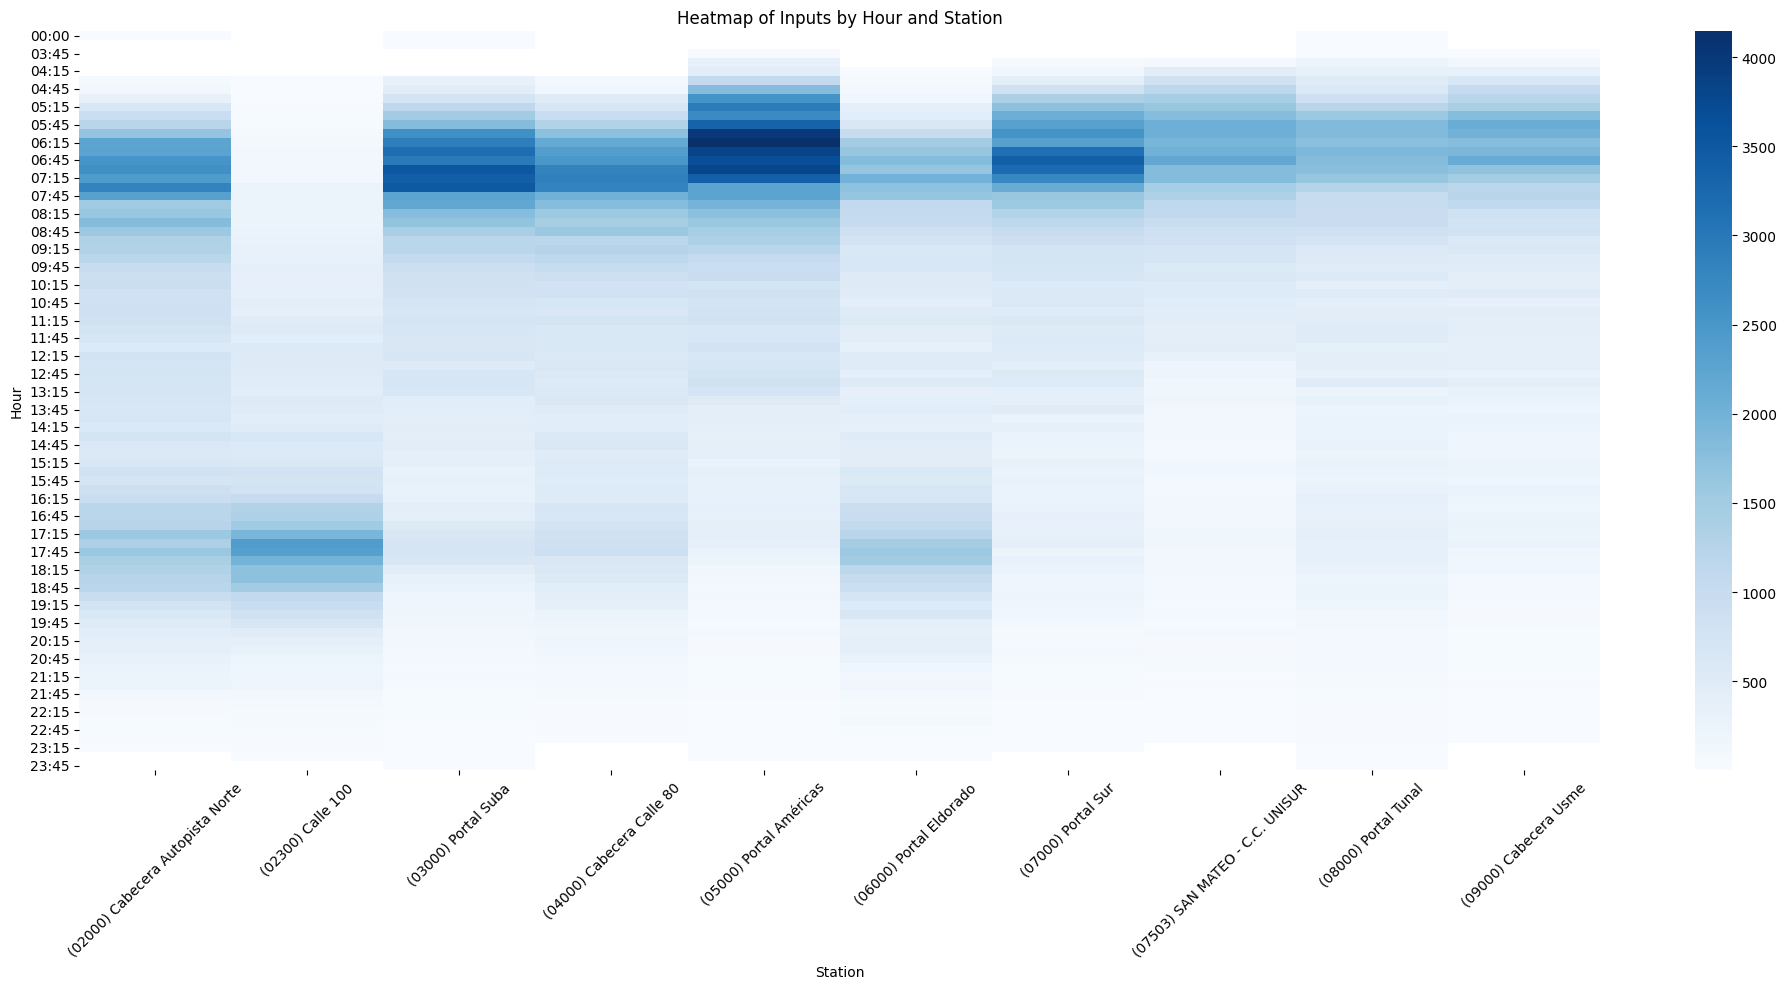

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos desde el archivo CSV
file_path = 'validacionTroncal20230608Col15Col410EstacionesGroupInputs.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Hour' a un formato más manejable (HH:MM)
data['Hour'] = pd.to_datetime(data['Hour']).dt.strftime('%H:%M')

# Agrupar los datos por 'Station' y 'Hour' y sumar los 'Inputs'
grouped_data = data.groupby(['Station', 'Hour']).agg({'Inputs':'sum'}).reset_index()

# Crear una tabla pivote para el mapa de calor usando pivot_table
pivot_table = grouped_data.pivot_table(index="Hour", columns="Station", values="Inputs")

# Crear el mapa de calor
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, cmap="Blues")
plt.title("Heatmap of Inputs by Hour and Station")
plt.ylabel("Hour")
plt.xlabel("Station")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
